# Imports

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from numpy.random import normal, uniform
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate, KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

import dill

In [2]:
%matplotlib inline

In [58]:
# dill.dump_session('SVR.db')

In [3]:
# dill.load_session('SVR.db')

In [4]:
SEED = 73 # random seed

# Data reading 

In [5]:
y_train = pd.read_csv('data/prepared/y_train.csv')
y_test = pd.read_csv('data/prepared/y_test.csv')

X_train_standartized = pd.read_csv('data/prepared/X_train_std.csv')
X_test_standartized = pd.read_csv('data/prepared/X_test_std.csv')

current_target = y_train.columns[0]

y_train = y_train.values.reshape(len(y_train))
y_test = y_test.values.reshape(len(y_test))

# SVR model

## Model building

In [9]:
svm_reg = SVR(kernel='rbf')

## Rough grid search

In [10]:
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

grid = {
    'gamma': np.geomspace(0.0001, 10, 6),
    'C': np.geomspace(0.0001, 1000, 8),
#     'epsilon': np.geomspace(0.0001, 10, 6)
}

gs = GridSearchCV(svm_reg, grid, 
                  n_jobs=-1, 
                  scoring=['neg_mean_squared_error', 'r2'], 
                  refit='neg_mean_squared_error', 
                  cv=cv, 
                  verbose=10)

In [11]:
%%time
gs.fit(X_train_standartized, y_train);

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1963s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 266 tas

Wall time: 39.5 s


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   39.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=73, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]), 'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'epsilon': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
       pre_dispatch='2*n_jobs', refit='neg_mean_squared_error',
       return_train_score='warn', scoring=['neg_mean_squared_error', 'r2'],
       verbose=10)

In [4]:
gs.best_params_

{'C': 500.0, 'epsilon': 25.0, 'gamma': 0.1}

## Fine tuning

In [15]:
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

grid = {
    'gamma': np.linspace(0.001, 1, 8),
    'C': np.geomspace(500, 10000, 8),
    'epsilon': np.geomspace(1, 100, 8)
}

gs = GridSearchCV(svm_reg, grid, 
                  n_jobs=-1, 
                  scoring=['neg_mean_squared_error', 'r2'], 
                  refit='neg_mean_squared_error', 
                  cv=cv, 
                  verbose=10)

In [16]:
%%time
gs.fit(X_train_standartized, y_train);

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0977s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 592 tas

Wall time: 2min 19s


[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  2.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=73, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': array([0.001  , 0.14371, 0.28643, 0.42914, 0.57186, 0.71457, 0.85729,
       1.     ]), 'C': array([  500.     ,   767.0637 ,  1176.77345,  1805.32039,  2769.59149,
        4248.9062 ,  6518.36345, 10000.     ]), 'epsilon': array([  1.     ,   1.9307 ,   3.72759,   7.19686,  13.89495,  26.82696,
        51.79475, 100.     ])},
       pre_dispatch='2*n_jobs', refit='neg_mean_squared_error',
       return_train_score='warn', scoring=['neg_mean_squared_error', 'r2'],
       verbose=10)

In [17]:
gs.best_params_

{'C': 767.0637023171956,
 'epsilon': 51.7947467923121,
 'gamma': 0.2864285714285714}

## Fine tuning 2

In [43]:
cv = KFold(n_splits=10, shuffle=True, random_state=SEED)

grid = {
    'gamma': np.linspace(0.1, 0.5, 6).round(3),
    'C': np.linspace(500, 1200, 8),
    'epsilon': np.linspace(25, 100, 6).round(3)
}

gs = GridSearchCV(svm_reg, grid, 
                  n_jobs=-1, 
                  scoring=['neg_mean_squared_error', 'r2'], 
                  refit='neg_mean_squared_error', 
                  cv=cv, 
                  verbose=10)

In [44]:
%%time
gs.fit(X_train_standartized, y_train);

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1948s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 240 tas

Wall time: 1min 5s


[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  1.1min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=73, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 ]), 'C': array([ 500.,  600.,  700.,  800.,  900., 1000., 1100., 1200.]), 'epsilon': array([ 25.,  40.,  55.,  70.,  85., 100.])},
       pre_dispatch='2*n_jobs', refit='neg_mean_squared_error',
       return_train_score='warn', scoring=['neg_mean_squared_error', 'r2'],
       verbose=10)

In [45]:
gs.best_params_

{'C': 500.0, 'epsilon': 25.0, 'gamma': 0.1}

In [46]:
print('Number of SVs:', len(svr.support_))
print('Number of training vectors:', len(X_train_standartized))

Number of SVs: 210
Number of training vectors: 750


In [47]:
svr = gs.best_estimator_

## Test on train

In [48]:
train_pred = svr.predict(X_train_standartized)

In [49]:
def comparsion_plot(true_values, predictions, data_type = 'test', current_target=current_target):
    plt.scatter(true_values, predictions)
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r')
    plt.xlabel('True Values' + ' (' + current_target + ')')
    plt.ylabel('Predictions' + ' (' + current_target + ')')
    plt.axis('equal')
    plt.axis('square')
    plt.title('Predictions on ' + data_type)
    plt.show()

In [50]:
def print_metrics(true_val, predicted_val):
    print('r =', np.corrcoef(true_val, predicted_val)[0,1].round(3))
    print('MSE =', mean_squared_error(true_val, predicted_val).round(3))
    print('R2 =', r2_score(true_val, predicted_val).round(3))

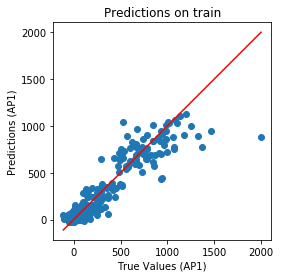

In [51]:
comparsion_plot(y_train, train_pred, data_type='train')

In [52]:
print_metrics(y_train, train_pred)

r = 0.944
MSE = 8273.873
R2 = 0.89


## Test on test

In [53]:
predictions = svr.predict(X_test_standartized)

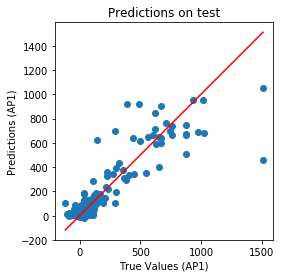

In [54]:
comparsion_plot(y_test, predictions, data_type='test')

In [55]:
print_metrics(y_test, predictions)

r = 0.891
MSE = 14132.27
R2 = 0.794


In [56]:
with open('SVR.cached', 'wb') as file:
    dill.dump(svr, file)